In [2]:
from preprocess import load_and_preprocess_all
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

df = load_and_preprocess_all()
df.head()

,id,title,selftext,created_utc,subreddit,group,text,clean_text,tokens
0,1ja3y0y,How does CS research work anyway? A.k.a. How t...,One question that comes up fairly frequently b...,1.741840e+09,computerscience,STEM,How does CS research work anyway? A.k.a. How t...,how does cs research work anyway aka how to ge...,"[cs, research, work, anyway, aka, get, cs, res..."
1,1j64cf5,Books and Resources,"Hi, r/computerscience. \n\nWe've updated our b...",1.741393e+09,computerscience,STEM,"Books and Resources Hi, r/computerscience. \n\...",books and resources hi rcomputerscience \n\nwe...,"[books, resources, hi, rcomputerscience, weve,..."
2,1m2ydqg,Books Every Computer Science Student Should Read,NaN,1.752833e+09,computerscience,STEM,Books Every Computer Science Student Should Read,books every computer science student should read,"[books, every, computer, science, student, read]"
3,1m3s8oc,Just noticed this typo,Hard to believe they got Brian Kernighan's nam...,1.752918e+09,computerscience,STEM,Just noticed this typo Hard to believe they go...,just noticed this typo hard to believe they go...,"[noticed, typo, hard, believe, got, brian, ker..."
4,1m3sxff,Selling projects requested.,Dm me for any projects that you’re looking to ...,1.752921e+09,computerscience,STEM,Selling projects requested. Dm me for any proj...,selling projects requested dm me for any proje...,"[selling, projects, requested, dm, projects, y..."


/var/folders/ms/vkggp_r1723b8zltks0ss29m0000gn/T/ipykernel_826/1675685915.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=data, palette='viridis')


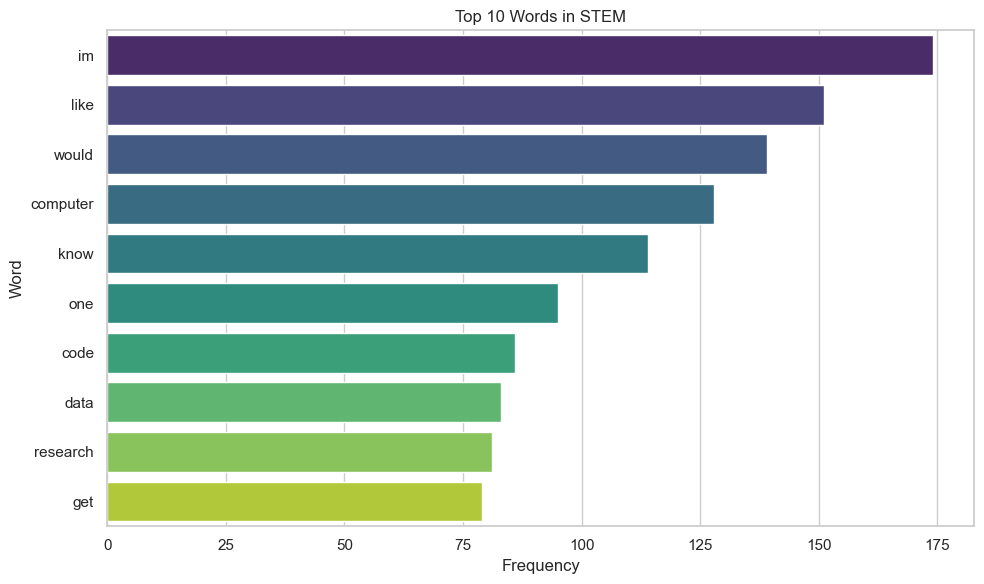

✅ Saved bar chart for STEM in output/stem_top_words.png


/var/folders/ms/vkggp_r1723b8zltks0ss29m0000gn/T/ipykernel_826/1675685915.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=data, palette='viridis')


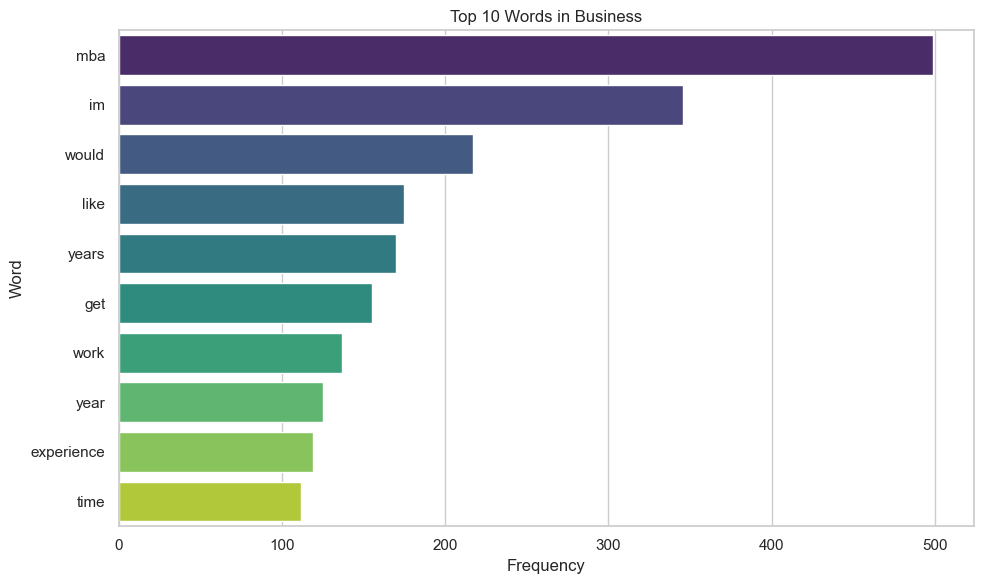

✅ Saved bar chart for Business in output/business_top_words.png


/var/folders/ms/vkggp_r1723b8zltks0ss29m0000gn/T/ipykernel_826/1675685915.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=data, palette='viridis')


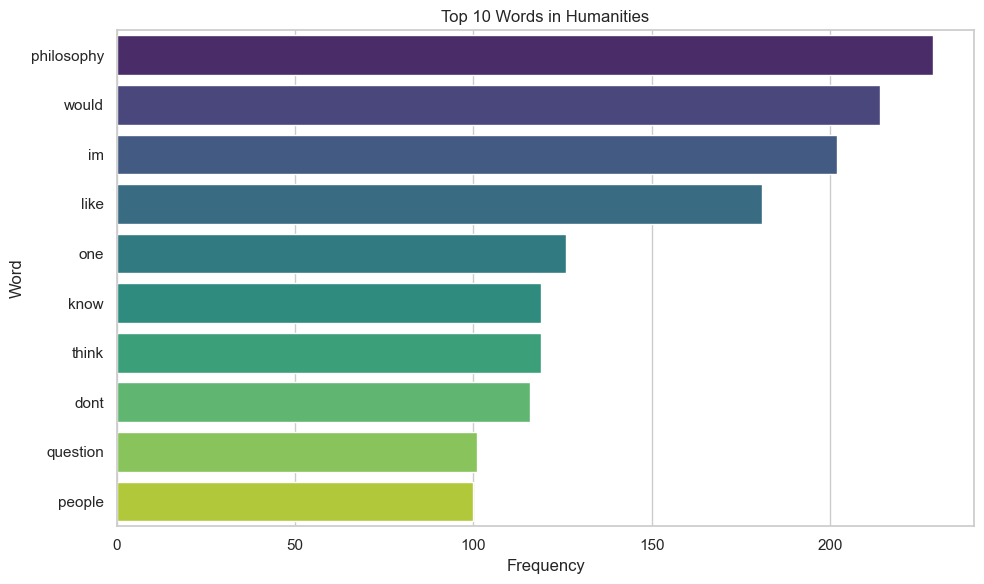

✅ Saved bar chart for Humanities in output/humanities_top_words.png


In [2]:
import pandas as pd
import seaborn as sns
import os

# output folder
os.makedirs("output", exist_ok=True)

# 그룹별로 Top N 단어 추출
TOP_N = 10
group_word_counts = {}

for group in df['group'].unique():
    tokens = df[df['group'] == group]['tokens'].explode()
    counter = Counter(tokens)
    top_words = counter.most_common(TOP_N)
    group_word_counts[group] = top_words

    # 데이터프레임 변환
    words, freqs = zip(*top_words)
    data = pd.DataFrame({'Word': words, 'Frequency': freqs})

    # 시각화
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=data, palette='viridis')
    plt.title(f"Top {TOP_N} Words in {group}")
    plt.tight_layout()
    plt.savefig(f"output/{group.lower()}_top_words.png")
    plt.show()
    print(f"✅ Saved bar chart for {group} in output/{group.lower()}_top_words.png")
